In [91]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import pandas as pd
# Load dataset
dane = pd.read_csv("C:\\Users\Mateusz\Desktop\storm.csv", sep=";")

# Organize our data
#label_names = data['target_names']
labels = dane['klasa']
feature_names = list(dane)[0:14]
features = dane[['podstawa', 'zachmurzenie ogolne', 'wiatr', 'poryw', 'temperatura powietrza', 
                 'temperatura termometru zwilzonego', 'cisnienie pary wodnej', 'wilgotnosc wzgledna', 
                 'temperatura punktu rosy', 'cisnienie na pozimie stacji', 'tendencja', 'wartosc tendencji',
                'zachmurzenie niskie']]

# Look at our data
#print(label_names)
#print('Class label = ', labels[0])
#print(feature_names)
#print(features[0:1])

# Split our data
train, test, train_labels, test_labels = train_test_split(features,
                                                          labels,
                                                          test_size=0.33,
                                                          random_state=42)

# Initialize our classifier
gnb = GaussianNB()

# Train our classifier
model = gnb.fit(train, train_labels)

# Make predictions
preds = gnb.predict(test)
#print(preds)

# Evaluate accuracy
print('Dokładność/accuracy: ', metrics.accuracy_score(test_labels, preds)*100, '%')
print('Precyzja/precision: ', metrics.precision_score(test_labels, preds)*100, '%')
print('Czułość/recall: ', metrics.recall_score(test_labels, preds)*100, '%')
print('AUC: ', metrics.roc_auc_score(test_labels, preds)*100, '%')
print(metrics.confusion_matrix(test_labels, preds))
print(metrics.classification_report(test_labels, preds))

# New predictions
nowe = pd.read_csv("C:\\Users\Mateusz\Desktop\stormw.csv", sep=";")
#new = nowe.values
#cechy = new[:,:-1]
klasy = nowe['klasa']
cechy = nowe[['podstawa', 'zachmurzenie ogolne', 'wiatr', 'poryw', 'temperatura powietrza', 
                 'temperatura termometru zwilzonego', 'cisnienie pary wodnej', 'wilgotnosc wzgledna', 
                 'temperatura punktu rosy', 'cisnienie na pozimie stacji', 'tendencja', 'wartosc tendencji',
                'zachmurzenie niskie']]
prediction = model.predict(cechy)

df = pd.DataFrame({'klasy': klasy, 'predictions': prediction})
df['nowe'] = df.apply(lambda x: 1
                                if x['klasy']==x['predictions']
                                else 0,
                                axis=1)

print(df['nowe'].sum())
print(df['nowe'].count())
print((df['nowe'].sum())/(df['nowe'].count()))

predykcja1 = (df['nowe'].sum())/(df['nowe'].count())
TP1 = metrics.confusion_matrix(test_labels, preds)[0][0]
FP1 = metrics.confusion_matrix(test_labels, preds)[1][0]
FN1 = metrics.confusion_matrix(test_labels, preds)[0][1]
TN1 = metrics.confusion_matrix(test_labels, preds)[1][1]
sensitivity1 = TP1 / (TP1 + FN1)
specificity1 = TN1 / (FP1 + TN1)
precision1 = TP1 / (TP1 + FP1)
neg_prec1 = TN1 / (TN1 + FN1)
accuracy1 = (TP1 + TN1) / (TP1 + FN1 + TN1 + FP1)


Dokładność/accuracy:  77.14285714285715 %
Precyzja/precision:  54.66101694915254 %
Czułość/recall:  74.13793103448276 %
AUC:  76.1728351710092 %
[[384 107]
 [ 45 129]]
              precision    recall  f1-score   support

           0       0.90      0.78      0.83       491
           1       0.55      0.74      0.63       174

    accuracy                           0.77       665
   macro avg       0.72      0.76      0.73       665
weighted avg       0.80      0.77      0.78       665

7656
9556
0.8011720385098368


In [108]:
dane.describe()

,podstawa,zachmurzenie ogolne,wiatr,poryw,temperatura powietrza,temperatura termometru zwilzonego,cisnienie pary wodnej,wilgotnosc wzgledna,temperatura punktu rosy,cisnienie na pozimie stacji,tendencja,wartosc tendencji,zachmurzenie niskie,klasa
count,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.00000
mean,5.699603,6.341609,3.750745,1.080437,18.630735,4.945283,16.928798,77.878352,14.278004,998.707051,3.974181,0.150745,4.575968,0.25422
std,1.369467,1.111064,2.295471,3.860262,5.708458,7.784337,4.519668,16.358277,5.054937,5.707815,2.424074,1.185559,2.035682,0.43553
min,1.000000,1.000000,0.000000,0.000000,-5.500000,-4.200000,3.500000,24.000000,-7.300000,970.800000,0.000000,-4.900000,1.000000,0.00000
25%,5.000000,6.000000,2.000000,0.000000,16.200000,0.000000,14.525000,66.000000,12.600000,995.400000,2.000000,-0.600000,3.000000,0.00000
50%,6.000000,7.000000,3.000000,0.000000,19.100000,0.000000,17.900000,82.000000,15.800000,998.800000,3.000000,0.200000,4.000000,0.00000
75%,7.000000,7.000000,5.000000,0.000000,22.000000,13.600000,20.300000,92.000000,17.800000,1002.700000,6.000000,0.800000,7.000000,1.00000
max,9.000000,8.000000,20.000000,30.000000,33.400000,23.300000,25.900000,100.000000,21.700000,1014.100000,8.000000,7.500000,7.000000,1.00000


In [92]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
# Load dataset
data = pd.read_csv("C:\\Users\Mateusz\Desktop\storm.csv", sep=";")

# Organize our data
#label_names = data['target_names']
labels = data['klasa']
feature_names = list(data)[0:14]
features = data[['podstawa', 'zachmurzenie ogolne', 'wiatr', 'poryw', 'temperatura powietrza', 
                 'temperatura termometru zwilzonego', 'cisnienie pary wodnej', 'wilgotnosc wzgledna', 
                 'temperatura punktu rosy', 'cisnienie na pozimie stacji', 'tendencja', 'wartosc tendencji',
                'zachmurzenie niskie']]

# Look at our data
#print(label_names)
#print('Class label = ', labels[0])
#print(feature_names)
#print(features[0:1])

# Split our data
train, test, train_labels, test_labels = train_test_split(features,
                                                          labels,
                                                          test_size=0.33,
                                                          random_state=42)

# Initialize our classifier
kneigh = KNeighborsClassifier(n_neighbors=20)

# Train our classifier
model = kneigh.fit(train, train_labels)

# Make predictions
preds = kneigh.predict(test)
#print(preds)

# Evaluate accuracy
print('Dokładność/accuracy: ', accuracy_score(test_labels, preds)*100, '%')
print('Precyzja/precision: ', metrics.precision_score(test_labels, preds)*100, '%')
print('Czułość/recall: ', metrics.recall_score(test_labels, preds)*100, '%')
print('AUC: ', metrics.roc_auc_score(test_labels, preds)*100, '%')
print(metrics.confusion_matrix(test_labels, preds))

# New predictions
nowe = pd.read_csv("C:\\Users\Mateusz\Desktop\stormw.csv", sep=";")
#new = nowe.values
#cechy = new[:,:-1]
klasy = nowe['klasa']
cechy = nowe[['podstawa', 'zachmurzenie ogolne', 'wiatr', 'poryw', 'temperatura powietrza', 
                 'temperatura termometru zwilzonego', 'cisnienie pary wodnej', 'wilgotnosc wzgledna', 
                 'temperatura punktu rosy', 'cisnienie na pozimie stacji', 'tendencja', 'wartosc tendencji',
                'zachmurzenie niskie']]
prediction = model.predict(cechy)

df = pd.DataFrame({'klasy': klasy, 'predictions': prediction})
df['nowe'] = df.apply(lambda x: 1
                                if x['klasy']==x['predictions']
                                else 0,
                                axis=1)
print(df['nowe'].sum())
print(df['nowe'].count())
print((df['nowe'].sum())/(df['nowe'].count()))

predykcja2 = (df['nowe'].sum())/(df['nowe'].count())
TP2 = metrics.confusion_matrix(test_labels, preds)[0][0]
FP2 = metrics.confusion_matrix(test_labels, preds)[1][0]
FN2 = metrics.confusion_matrix(test_labels, preds)[0][1]
TN2 = metrics.confusion_matrix(test_labels, preds)[1][1]
sensitivity2 = TP2 / (TP2 + FN2)
specificity2 = TN2 / (FP2 + TN2)
precision2 = TP2 / (TP2 + FP2)
neg_prec2 = TN2 / (TN2 + FN2)
accuracy2 = (TP2 + TN2) / (TP2 + FN2 + TN2 + FP2)

Dokładność/accuracy:  78.19548872180451 %
Precyzja/precision:  69.33333333333334 %
Czułość/recall:  29.88505747126437 %
AUC:  62.60036987616172 %
[[468  23]
 [122  52]]
8813
9556
0.922247802427794


średnia dokładność:  0.7586848635235732
średnia czulosc:  0.5361952606810865
średnia precyzja:  0.5205761959826259
[[261  36]
 [ 55  51]]
7721
9556
0.8079740477187107


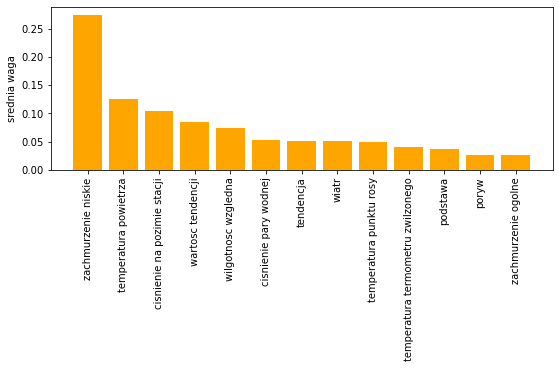

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
import statistics

data = pd.read_csv("C:\\Users\Mateusz\Desktop\storm.csv", sep=";")

dictionary = {
    "podstawa": [],
    "zachmurzenie ogolne": [],
    "wiatr": [],
    "poryw": [],
    "temperatura powietrza": [],
    "temperatura termometru zwilzonego": [],
    "cisnienie pary wodnej": [],
    "wilgotnosc wzgledna": [],
    "temperatura punktu rosy": [],
    "cisnienie na pozimie stacji": [],
    "tendencja": [],
    "wartosc tendencji": [],
    "zachmurzenie niskie": []
}

accuracy = {"dokladnosc": []}
recall = {"czulosc": []}
precision = {"precyzja": []}
auc = {"auc": []}


# Organize our data
#label_names = data['target_names']
#labels = data['klasa']
#feature_names = list(data)[0:14]
#features = data[['podstawa', 'zachmurzenie ogolne', 'wiatr', 'poryw', 'temperatura powietrza', 
                # 'temperatura termometru zwilzonego', 'cisnienie pary wodnej', 'wilgotnosc wzgledna', 
                # 'temperatura punktu rosy', 'cisnienie na pozimie stacji', 'tendencja', 'wartosc tendencji',
               # 'zachmurzenie niskie']]

# dividing data into attributes and labels
X = data.drop('klasa', axis=1)
y = data['klasa']
for i in range(100):
    
    # dividing data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

    # train the algorithm
    classifier = DecisionTreeClassifier(random_state=100)
    model = classifier.fit(X_train, y_train)

    # make predictions on the test data
    y_pred = classifier.predict(X_test)

    
    dokladnosc = metrics.accuracy_score(y_test, y_pred)
    accuracy["dokladnosc"].append(dokladnosc)
    czulosc = metrics.recall_score(y_test, y_pred)
    recall["czulosc"].append(czulosc)
    precyzja = metrics.precision_score(y_test, y_pred)
    precision["precyzja"].append(precyzja)

    # feature importance
    importance = pd.DataFrame({'feature': X_train.columns, 
        'importance' : np.round(classifier.feature_importances_, 3)})
    importance.sort_values('importance', ascending=False, inplace = True)
    
    dictionary["podstawa"].append(importance["importance"][0])
    dictionary["zachmurzenie ogolne"].append(importance["importance"][1])
    dictionary["wiatr"].append(importance["importance"][2])
    dictionary["poryw"].append(importance["importance"][3])
    dictionary["temperatura powietrza"].append(importance["importance"][4])
    dictionary["temperatura termometru zwilzonego"].append(importance["importance"][5])
    dictionary["cisnienie pary wodnej"].append(importance["importance"][6])
    dictionary["wilgotnosc wzgledna"].append(importance["importance"][7])
    dictionary["temperatura punktu rosy"].append(importance["importance"][8])
    dictionary["cisnienie na pozimie stacji"].append(importance["importance"][9])
    dictionary["tendencja"].append(importance["importance"][10])
    dictionary["wartosc tendencji"].append(importance["importance"][11])
    dictionary["zachmurzenie niskie"].append(importance["importance"][12])

print('średnia dokładność: ', statistics.mean(accuracy['dokladnosc']))
print('średnia czulosc: ', statistics.mean(recall['czulosc']))
print('średnia precyzja: ', statistics.mean(precision['precyzja']))
print(metrics.confusion_matrix(y_test, y_pred))


# New predictions
nowe = pd.read_csv("C:\\Users\Mateusz\Desktop\stormw.csv", sep=";")
#new = nowe.values
#cechy = new[:,:-1]
klasy = nowe['klasa']
cechy = nowe[['podstawa', 'zachmurzenie ogolne', 'wiatr', 'poryw', 'temperatura powietrza', 
                 'temperatura termometru zwilzonego', 'cisnienie pary wodnej', 'wilgotnosc wzgledna', 
                 'temperatura punktu rosy', 'cisnienie na pozimie stacji', 'tendencja', 'wartosc tendencji',
                'zachmurzenie niskie']]
prediction = model.predict(cechy)

df = pd.DataFrame({'klasy': klasy, 'predictions': prediction})
df['nowe'] = df.apply(lambda x: 1
                                if x['klasy']==x['predictions']
                                else 0,
                                axis=1)
print(df['nowe'].sum())
print(df['nowe'].count())
print((df['nowe'].sum())/(df['nowe'].count()))

predykcja3 = (df['nowe'].sum())/(df['nowe'].count())
TP3 = metrics.confusion_matrix(test_labels, preds)[0][0]
FP3 = metrics.confusion_matrix(test_labels, preds)[1][0]
FN3 = metrics.confusion_matrix(test_labels, preds)[0][1]
TN3 = metrics.confusion_matrix(test_labels, preds)[1][1]
sensitivity3 = TP3 / (TP3 + FN3)
specificity3 = TN3 / (FP3 + TN3)
precision3 = TP3 / (TP3 + FP3)
neg_prec3 = TN3 / (TN3 + FN3)
accuracy3 = (TP3 + TN3) / (TP3 + FN3 + TN3 + FP3)

df = pd.DataFrame(columns=['parametr', 'srednia'])

# adding values to the dataframe
for x in dictionary:
    df = df.append({'parametr': x, 'srednia': statistics.mean(dictionary[x])}, ignore_index=True)
sort = df.sort_values(by=['srednia'], ascending=False)

# bar chart
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 3))
plt.bar(sort['parametr'], sort['srednia'], color='orange')
plt.xticks(rotation='vertical')
plt.ylabel('srednia waga')
plt.show()



In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

# Load dataset
data = pd.read_csv("C:\\Users\Mateusz\Desktop\storm.csv", sep=";")

# Organize our data
#label_names = data['target_names']
labels = data['klasa']
feature_names = list(data)[0:14]
features = data[['podstawa', 'zachmurzenie ogolne', 'wiatr', 'poryw', 'temperatura powietrza', 
                 'temperatura termometru zwilzonego', 'cisnienie pary wodnej', 'wilgotnosc wzgledna', 
                 'temperatura punktu rosy', 'cisnienie na pozimie stacji', 'tendencja', 'wartosc tendencji',
                'zachmurzenie niskie']]

# Look at our data
#print(label_names)
#print('Class label = ', labels[0])
#print(feature_names)
#print(features[0:1])

# Split our data
train, test, train_labels, test_labels = train_test_split(features,
                                                          labels,
                                                          test_size=0.33,
                                                          random_state=42)

# Initialize our classifier
svm = svm.SVC(kernel='linear') # Linear Kernel

# Train our classifier
model = svm.fit(train, train_labels)

# Make predictions
preds = svm.predict(test)
#print(preds)

print('Dokładność/accuracy: ', accuracy_score(test_labels, preds)*100, '%')
print('Precyzja/precision: ', metrics.precision_score(test_labels, preds)*100, '%')
print('Czułość/recall: ', metrics.recall_score(test_labels, preds)*100, '%')
print('AUC: ', metrics.roc_auc_score(test_labels, preds)*100, '%')
print(metrics.confusion_matrix(test_labels, preds))

# New predictions
nowe = pd.read_csv("C:\\Users\Mateusz\Desktop\stormw.csv", sep=";")
#new = nowe.values
#cechy = new[:,:-1]
klasy = nowe['klasa']
cechy = nowe[['podstawa', 'zachmurzenie ogolne', 'wiatr', 'poryw', 'temperatura powietrza', 
                 'temperatura termometru zwilzonego', 'cisnienie pary wodnej', 'wilgotnosc wzgledna', 
                 'temperatura punktu rosy', 'cisnienie na pozimie stacji', 'tendencja', 'wartosc tendencji',
                'zachmurzenie niskie']]
prediction = model.predict(cechy)

df = pd.DataFrame({'klasy': klasy, 'predictions': prediction})
df['nowe'] = df.apply(lambda x: 1
                                if x['klasy']==x['predictions']
                                else 0,
                                axis=1)
print(df['nowe'].sum())
print(df['nowe'].count())
print((df['nowe'].sum())/(df['nowe'].count()))

predykcja4 = (df['nowe'].sum())/(df['nowe'].count())
TP4 = metrics.confusion_matrix(test_labels, preds)[0][0]
FP4 = metrics.confusion_matrix(test_labels, preds)[1][0]
FN4 = metrics.confusion_matrix(test_labels, preds)[0][1]
TN4 = metrics.confusion_matrix(test_labels, preds)[1][1]
sensitivity4 = TP4 / (TP4 + FN4)
specificity4 = TN4 / (FP4 + TN4)
precision4 = TP4 / (TP4 + FP4)
neg_prec4 = TN4 / (TN4 + FN4)
accuracy4 = (TP4 + TN4) / (TP4 + FN4 + TN4 + FP4)


Dokładność/accuracy:  78.64661654135338 %
Precyzja/precision:  58.333333333333336 %
Czułość/recall:  64.36781609195403 %
AUC:  74.03726853477538 %
[[411  80]
 [ 62 112]]
7716
9556
0.807450816241105


In [96]:
# Logistic Regression
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

# Load dataset
data = pd.read_csv("C:\\Users\Mateusz\Desktop\storm.csv", sep=";")

# Organize our data
#label_names = data['target_names']
labels = data['klasa']
feature_names = list(data)[0:14]
features = data[['podstawa', 'zachmurzenie ogolne', 'wiatr', 'poryw', 'temperatura powietrza', 
                 'temperatura termometru zwilzonego', 'cisnienie pary wodnej', 'wilgotnosc wzgledna', 
                 'temperatura punktu rosy', 'cisnienie na pozimie stacji', 'tendencja', 'wartosc tendencji',
                'zachmurzenie niskie']]

# Split our data
train, test, train_labels, test_labels = train_test_split(features,
                                                          labels,
                                                          test_size=0.33,
                                                          random_state=42)

# Initialize our classifier
LR = LogisticRegression(solver='liblinear', random_state=80, penalty='l2', max_iter=100, C=0.4)

# Train our classifier
model = LR.fit(train, train_labels)

# returns the matrix of probabilities that the predicted output is equal to zero or one
proba = LR.predict_proba(test)

# Make predictions
preds = LR.predict(test)

print('Dokładność/accuracy: ', metrics.accuracy_score(test_labels, preds)*100, '%')
print('Predyzja/precision: ', metrics.precision_score(test_labels, preds)*100, '%')
print('Czułość/recall: ', metrics.recall_score(test_labels, preds)*100, '%')
print('AUC: ', metrics.roc_auc_score(test_labels, preds)*100, '%')
print(metrics.confusion_matrix(test_labels, preds))

# New predictions
nowe = pd.read_csv("C:\\Users\Mateusz\Desktop\stormw.csv", sep=";")
#new = nowe.values
#cechy = new[:,:-1]
klasy = nowe['klasa']
cechy = nowe[['podstawa', 'zachmurzenie ogolne', 'wiatr', 'poryw', 'temperatura powietrza', 
                 'temperatura termometru zwilzonego', 'cisnienie pary wodnej', 'wilgotnosc wzgledna', 
                 'temperatura punktu rosy', 'cisnienie na pozimie stacji', 'tendencja', 'wartosc tendencji',
                'zachmurzenie niskie']]
prediction = model.predict(cechy)

df = pd.DataFrame({'klasy': klasy, 'predictions': prediction})
df['nowe'] = df.apply(lambda x: 1
                                if x['klasy']==x['predictions']
                                else 0,
                                axis=1)
print(df['nowe'].sum())
print(df['nowe'].count())
print((df['nowe'].sum())/(df['nowe'].count()))

predykcja5 = (df['nowe'].sum())/(df['nowe'].count())
TP5 = metrics.confusion_matrix(test_labels, preds)[0][0]
FP5 = metrics.confusion_matrix(test_labels, preds)[1][0]
FN5 = metrics.confusion_matrix(test_labels, preds)[0][1]
TN5 = metrics.confusion_matrix(test_labels, preds)[1][1]
sensitivity5 = TP5 / (TP5 + FN5)
specificity5 = TN5 / (FP5 + TN5)
precision5 = TP5 / (TP5 + FP5)
neg_prec5 = TN5 / (TN5 + FN5)
accuracy5 = (TP5 + TN5) / (TP5 + FN5 + TN5 + FP5)


Dokładność/accuracy:  78.49624060150376 %
Predyzja/precision:  58.37837837837838 %
Czułość/recall:  62.06896551724138 %
AUC:  73.19334222908913 %
[[414  77]
 [ 66 108]]
7804
9556
0.8166596902469653


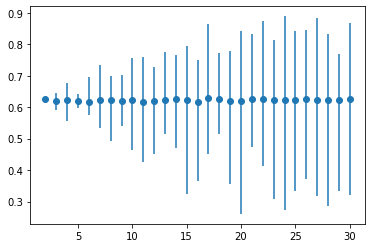

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import mean
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# Load dataset
data = pd.read_csv("C:\\Users\Mateusz\Desktop\storm.csv", sep=";")

# Organize our data
#label_names = data['target_names']
labels = data['klasa']
feature_names = list(data)[0:14]
features = data[['podstawa', 'zachmurzenie ogolne', 'wiatr', 'poryw', 'temperatura powietrza', 
                 'temperatura termometru zwilzonego', 'cisnienie pary wodnej', 'wilgotnosc wzgledna', 
                 'temperatura punktu rosy', 'cisnienie na pozimie stacji', 'tendencja', 'wartosc tendencji',
                'zachmurzenie niskie']]

# Split our data
# train, test, train_labels, test_labels = train_test_split(features,
                                                          #labels,
                                                          #test_size=0.33,
                                                          #random_state=42)
# evaluate the model using a given test condition
def evaluate_model(cv):
    # Initialize our classifier
    LR = LogisticRegression(solver='liblinear', random_state=80, penalty='l2', max_iter=100, C=0.4)
    #scores_accuracy = cross_val_score(LR, features, labels, scoring='accuracy', cv=cv, n_jobs=-1)
    #scores_recall = cross_val_score(LR, features, labels, scoring='recall', cv=cv, n_jobs=-1)
    scores_precision = cross_val_score(LR, features, labels, scoring='precision', cv=cv, n_jobs=-1)
    return mean(scores_precision), scores_precision.min(), scores_precision.max()
    
# define folds to test
folds = range(2,31)

means, mins, maxs = list(),list(),list()

# evaluate each k value
for k in folds:
    # define the test condition
    cv = KFold(n_splits=k, shuffle=True, random_state=1)
    # evaluate k value
    k_mean, k_min, k_max = evaluate_model(cv)
    # store mean accuracy
    means.append(k_mean)
    # store min and max relative to the mean
    mins.append(k_mean - k_min)
    maxs.append(k_max - k_mean)

# line plot of k mean values with min/max error bars
plt.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
plt.show()            



# Train our classifier
#model = LR.fit(train, train_labels)

# returns the matrix of probabilities that the predicted output is equal to zero or one
#proba = LR.predict_proba(test)

# Make predictions
#preds = LR.predict(test)
#print('Dokładność: ', mean(scores_accuracy))
#print('Czułość: ', mean(scores_recall))
#print('Precyzja: ', mean(scores_precision))

In [55]:
# import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import *

data = pd.read_csv("C:\\Users\Mateusz\Desktop\storm.csv", sep=";")
dane = data.values
X = dane[:,:-1]
y = dane[:,-1]

LR = LogisticRegression(solver='liblinear', random_state=80, penalty='l2', max_iter=100, C=0.4)

cv = KFold(n_splits=10, shuffle=True, random_state=1)

accuracies = []
recalls = []
precisions = []
matrixes = []
for train, test in cv.split(X,y):
    X_train, y_train = X[train], y[train]
    X_test, y_test = X[test], y[test]
    LR.fit(X_train, y_train)
    pred_values = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, pred_values)
    accuracies.append(accuracy)
    recall = metrics.recall_score(y_test, pred_values)
    recalls.append(recall)
    precision = metrics.precision_score(y_test, pred_values)
    precisions.append(precision)
    conf_mtx = metrics.confusion_matrix(y_test, pred_values)
    matrixes.append(conf_mtx)

mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
print("Średnia dokładność %.3f (+- %.2f)" % (mean_accuracy, std_accuracy))
print("Średnia czułość %.3f (+- %.2f)" % (np.mean(recalls), np.std(recalls)))
print("Średnia precyzja %.3f (+- %.2f)" % (np.mean(precisions), np.std(precisions)))
print("Dokładność: ", accuracies)
print("Czułość: ", recalls)
print("Precyzja: ", precisions)
print("Macierz pomyłek: ", matrixes)

Średnia dokładność 0.811 (+- 0.03)
Średnia czułość 0.648 (+- 0.05)
Średnia precyzja 0.627 (+- 0.06)
Dokładność:  [0.7920792079207921, 0.8316831683168316, 0.8415841584158416, 0.8514851485148515, 0.7562189054726368, 0.835820895522388, 0.8407960199004975, 0.7810945273631841, 0.7761194029850746, 0.8009950248756219]
Czułość:  [0.5490196078431373, 0.6923076923076923, 0.6590909090909091, 0.6, 0.6451612903225806, 0.66, 0.6666666666666666, 0.6428571428571429, 0.639344262295082, 0.7254901960784313]
Precyzja:  [0.5957446808510638, 0.6666666666666666, 0.6304347826086957, 0.6923076923076923, 0.5970149253731343, 0.673469387755102, 0.72, 0.48214285714285715, 0.6290322580645161, 0.5873015873015873]
Macierz pomyłek:  [array([[132,  19],
       [ 23,  28]], dtype=int64), array([[132,  18],
       [ 16,  36]], dtype=int64), array([[141,  17],
       [ 15,  29]], dtype=int64), array([[145,  12],
       [ 18,  27]], dtype=int64), array([[112,  27],
       [ 22,  40]], dtype=int64), array([[135,  16],
     

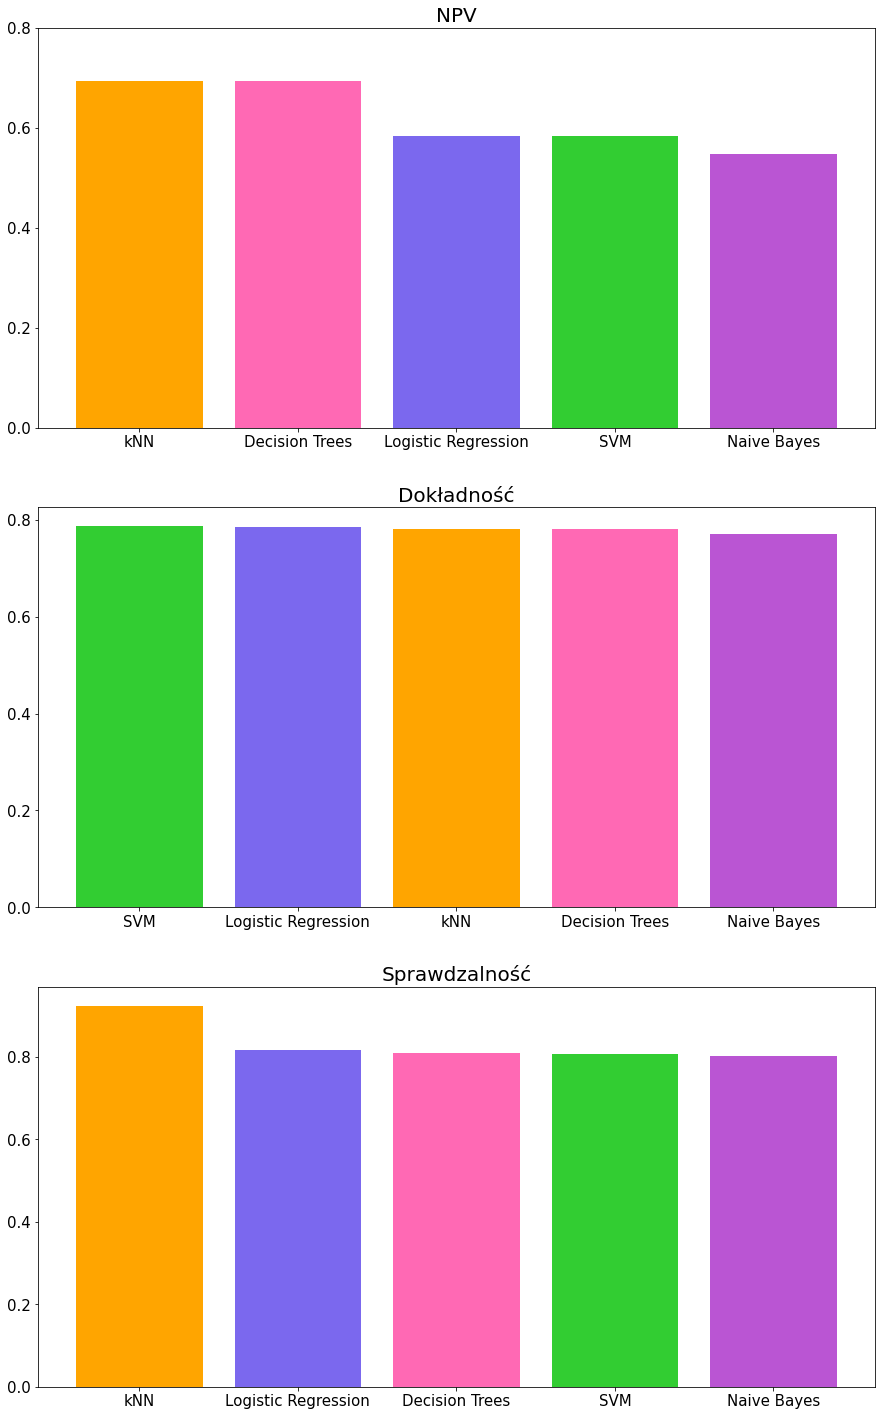

In [134]:
metody = ['Naive Bayes', 'kNN', 'Decision Trees', 'SVM', 'Logistic Regression']
barwy = ['mediumorchid', 'orange', 'hotpink', 'limegreen', 'mediumslateblue']
wyniki = pd.DataFrame({'metody': metody, 'barwy': barwy,
                        'czulosc': list([sensitivity1, sensitivity2, sensitivity3, sensitivity4, sensitivity5]),
                       'specyficznosc': list([specificity1, specificity2, specificity3, specificity4, specificity5]),
                       'precyzja': list([precision1, precision2, precision3, precision4, precision5]),
                       'NPV': list([neg_prec1, neg_prec2, neg_prec3, neg_prec4, neg_prec5]),
                       'dokladnosc': list([accuracy1, accuracy2, accuracy3, accuracy4, accuracy5]),
                       'predykcja': list([predykcja1, predykcja2, predykcja3, predykcja4, predykcja5])})

sort1 = wyniki.sort_values('czulosc', ascending=False)
plt.figure(figsize=(15, 25))
plt.subplot(3,1,1)
plt.bar('metody', 'czulosc', data=sort1, color='barwy')
plt.yticks(np.arange(0,1, 0.2), fontsize=15)
plt.xticks(np.arange(0,5), fontsize=15)
plt.title('Czułość', fontsize=20)

sort2 = wyniki.sort_values('specyficznosc', ascending=False)
plt.subplot(3,1,2)
plt.bar('metody', 'specyficznosc', data=sort2, color='barwy')
plt.yticks(np.arange(0,1, 0.2), fontsize=15)
plt.xticks(np.arange(0,5), fontsize=15)
plt.title('Specyficzność', fontsize=20)

sort3 = wyniki.sort_values('precyzja', ascending=False)
plt.subplot(3,1,3)
plt.bar('metody', 'precyzja', data=sort3, color='barwy')
plt.yticks(np.arange(0,1, 0.2), fontsize=15)
plt.xticks(np.arange(0,5), fontsize=15)
plt.title('Precyzja', fontsize=20)

sort4 = wyniki.sort_values('NPV', ascending=False)
plt.subplot(3,1,1)
plt.bar('metody', 'NPV', data=sort4, color='barwy')
plt.yticks(np.arange(0,1, 0.2), fontsize=15)
plt.xticks(np.arange(0,5), fontsize=15)
plt.title('NPV', fontsize=20)

sort5 = wyniki.sort_values('dokladnosc', ascending=False)
plt.subplot(3,1,2)
plt.bar('metody', 'dokladnosc', data=sort5, color='barwy')
plt.yticks(np.arange(0,1, 0.2), fontsize=15)
plt.xticks(np.arange(0,5), fontsize=15)
plt.title('Dokładność', fontsize=20)

sort6 = wyniki.sort_values('predykcja', ascending=False)
plt.subplot(3,1,3)
plt.bar('metody', 'predykcja', data=sort6, color='barwy')
plt.yticks(np.arange(0,1, 0.2), fontsize=15)
plt.xticks(np.arange(0,5), fontsize=15)
plt.title('Sprawdzalność', fontsize=20)
plt.show()

